# Importing the libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [ ]:
import xgboost as xgb
import lightgbm as lgb


# Clearly defined problem statement and data description



## Problem Statement:
We aim to develop a predictive model that can predict the success of a song on the Spotify platform. The success metric can be its number of streams, its position on the charts, or other related indicators. The prediction will be based on various attributes of the song, such as its audio features, release date, and attributes related to the artist(s).

## Data Description:
The dataset contains information about the most famous songs of 2023 as listed on Spotify. Here are the features available in the dataset:

- **track_name**: Name of the song.
- **artist(s)_name**: Name of the artist(s) of the song.
- **artist_count**: Number of artists contributing to the song.
- **released_year**: Year the song was released.
- **released_month**: Month the song was released.
- **released_day**: Day of the month the song was released.
- **in_spotify_playlists**: Number of Spotify playlists the song is included in.
- **in_spotify_charts**: Presence and rank of the song on Spotify charts.
- **streams**: Total number of streams on Spotify.
- **in_apple_playlists**: Number of Apple Music playlists the song is included in.
- **in_apple_charts**: Presence and rank of the song on Apple Music charts.
- **in_deezer_playlists**: Number of Deezer playlists the song is included in.
- **in_deezer_charts**: Presence and rank of the song on Deezer charts.
- **in_shazam_charts**: Presence and rank of the song on Shazam charts.
- **bpm**: Beats per minute (tempo of the song).
- **key**: Key of the song.
- **mode**: Mode of the song (major or minor).
- **danceability_%**: How suitable the song is for dancing (in percentage).
- **valence_%**: Positivity of the song's musical content (in percentage).
- **energy_%**: Perceived energy level of the song (in percentage).
- **acousticness_%**: Amount of acoustic sound in the song (in percentage).
- **instrumentalness_%**: Amount of instrumental content in the song (in percentage).
- **liveness_%**: Presence of live performance elements in the song (in percentage).
- **speechiness_%**: Amount of spoken words in the song (in percentage).


# Exploratory Data Analysis (EDA)

During EDA, we'll perform the following tasks:

- Get a quick overview of the dataset.
- Analyze the distributions of key features.
- Check for missing values and handle them if any exist.
- Visualize relationships and correlations between features.


In [ ]:
# Reading the CSV with 'ISO-8859-1' encoding
data = pd.read_csv("/content/spotify-2023.csv", encoding='ISO-8859-1')
# Display the first few rows of the dataset
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
data.shape


(953, 24)

In [ ]:
# Display basic statistics for numeric columns
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


Here's a summary of the basic statistics for the numeric columns:

- **artist_count**: Most of the songs are by a single artist, but there are songs with up to 8 contributing artists.
- **released_year**: The songs in this dataset span from 1930 to 2023. However, the 25th percentile starts from 2020, indicating that a significant portion of the songs is quite recent.
- **in_spotify_playlists**: The songs are included in a wide range of playlists, with the maximum being 52,898 playlists.
- **in_spotify_charts**: The maximum rank of a song on Spotify charts in this dataset is 147.
- **bpm (Beats Per Minute)**: Ranges from 65 to 206, indicating a variety of song tempos.
- **danceability_%**, **valence_%**, **energy_%**, and others: These are measures of the audio features of the songs, and they have varying distributions.


In [ ]:
# bin similiar columns
tune = ['bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
                  'instrumentalness_%', 'liveness_%', 'speechiness_%']

list_chart = ['streams', 'in_spotify_playlists', 'in_spotify_charts',
              'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
              'in_deezer_charts', 'in_shazam_charts']

data['solo'] = data['artist_count'].apply(lambda x: 0 if x > 1 else 1)

top_chart = ['artist(s)_name', 'solo', 'key', 'released_year', 'released_month']

In [ ]:
# top song feature
plt.figure(figsize=(16, 12))
top_n = 10
for i, col in enumerate(top_chart, 1):
    plt.subplot(3, 2, i)
    data_count = data[col].value_counts()
    top_data = data_count.head(top_n)
    top_data.plot(kind='bar', color='skyblue')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Top of {col} in dataset")
    plt.tight_layout()
plt.show()

The above charts show Top 10 songs by Artist, Type of collaboration, Key, Released year/month.

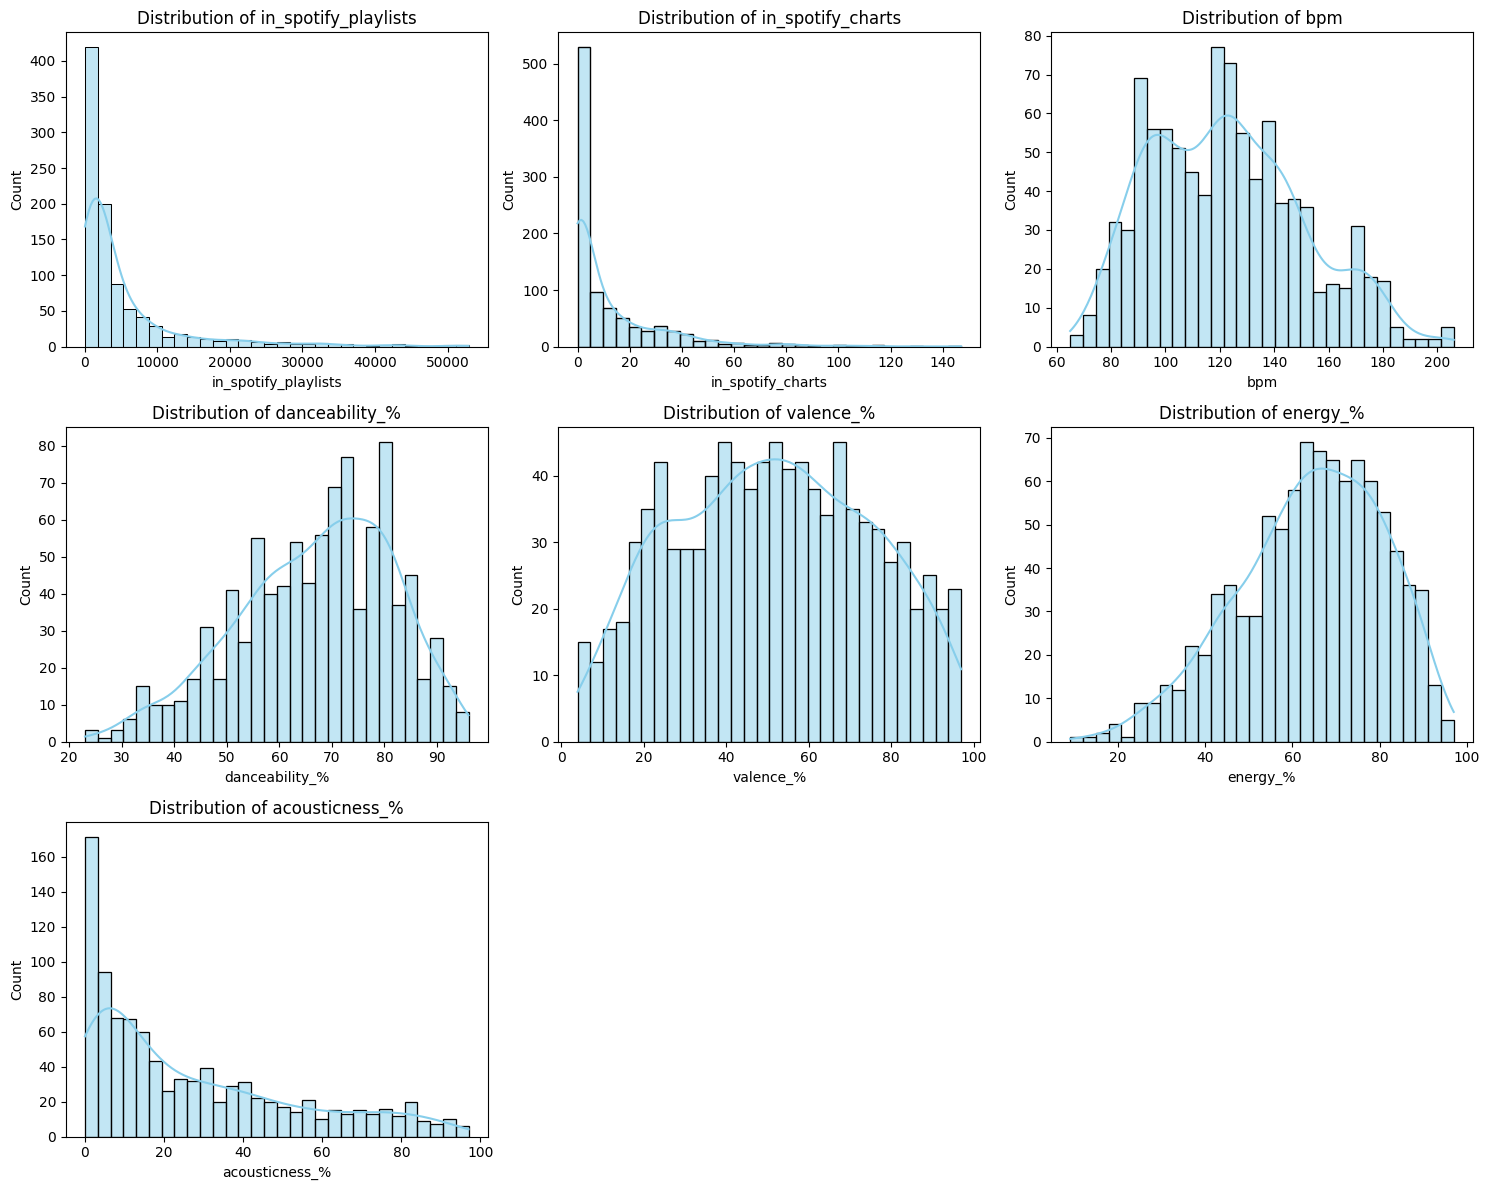

In [ ]:
# Columns to visualize
cols_to_viz = ['in_spotify_playlists', 'in_spotify_charts', 'bpm',
               'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']

# Plot the distributions
plt.figure(figsize=(15, 12))
for i, col in enumerate(cols_to_viz, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

**Here**'s a visual representation of the distributions for some key features:

- **in_spotify_playlists**: Most songs are present in a few playlists, with a few songs present in a large number of playlists.
- **in_spotify_charts**: Many songs are not present in the Spotify charts (0 rank). However, there's a wide range of ranks for the songs that are.
- **bpm (Beats Per Minute)**: We can observe a diverse distribution of song tempos, with peaks around the 100 and 140 BPM marks.
- **danceability_%**: The majority of songs have high danceability, with a peak around 70%.
- **valence_%**: The distribution is fairly uniform, meaning songs in the dataset span a wide range of moods.
- **energy_%**: The majority of songs have medium to high energy levels.
- **acousticness_%**: Most songs have low acousticness, with a few exceptions having high acoustic content.


In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


in_shazam_charts    50
key                 95
dtype: int64

The columns with missing values are:

- **in_shazam_charts**: 50 missing values
- **key**: 95 missing values


To handle these missing values, we can adopt the following strategies:

- For `in_shazam_charts`, since it represents the presence and rank of the song on Shazam charts, we can assume that missing values indicate the song's absence from the chart. Thus, we can replace missing values with 0.
- For `key`, which represents the musical key of the song, we can replace the missing values with the mode (most frequent value) of the column.


In [ ]:
# Fill missing values
data['in_shazam_charts'].fillna(0, inplace=True)
data['key'].fillna(data['key'].mode()[0], inplace=True)

# Check if all missing values are handled
missing_values_updated = data.isnull().sum()
missing_values_updated[missing_values_updated > 0]


Series([], dtype: int64)

In [ ]:
#copy data
copied_df = data.copy()

# change data type to numeric
copied_df['streams'] = pd.to_numeric(copied_df['streams'], errors='coerce')
copied_df['streams'] = copied_df['streams'].fillna(0).astype(np.int64)

copied_df['in_deezer_playlists'] = pd.to_numeric(copied_df['in_deezer_playlists'], errors='coerce')
copied_df['in_deezer_playlists'] = copied_df['in_deezer_playlists'].fillna(0).astype(np.int64)
copied_df['in_shazam_charts'] = pd.to_numeric(copied_df['in_shazam_charts'], errors='coerce')
copied_df['in_shazam_charts'] = copied_df['in_shazam_charts'].fillna(0).astype(np.int64)

In [ ]:
plt.figure(figsize=(16, 12))
groupby_col = 'artist(s)_name'
# groupby_col = 'key'
# groupby_col = 'track_name'
# groupby_col = 'danceability_%'

for i, col in enumerate(list_chart, 1):
    plt.subplot(4, 2, i)

    # sum list_chart by artist name and get the top 10
    data_sum = copied_df.groupby(groupby_col)[col].sum()
    data_sorted = data_sum.sort_values(ascending=False).head(top_n)

    # Create a bar chart for the current column by artist_name
    data_sorted.plot(kind='barh', color='skyblue')
    plt.xlabel(col.capitalize())
    plt.ylabel(groupby_col)
    plt.title(f'Top 10 {groupby_col} by {col.capitalize()}')
    plt.gca().invert_yaxis()  # Reverse the order of artists
    plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA) Summary:

We've visualized the distribution of some key features such as 'in_spotify_playlists', 'in_spotify_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', and 'acousticness_%'.

The dataset has a total of 953 songs, and from the basic statistics:

- The majority of songs are from recent years, with a median release year of 2022.
- Most songs are in the Major mode, have a median BPM of 121, and a danceability score around 69%.
- Most of popular songs have around 65% of energy level and minimum of acousticness_%
- The average song has been added to about 5200 Spotify playlists and appeared on Spotify charts about 12 times.
- There is a consistency Artists in 2022 whose songs were played or streamed the most.

We've identified and addressed missing values in the 'in_shazam_charts' and 'key' columns.


# Data Pre-processing

For this phase:

- We'll handle categorical features by encoding them.
- Scale the numerical features for better model performance.
- Split the data into training and test sets.


Let's start with handling the categorical features. For our dataset, the categorical features are `track_name`, `artist(s)_name`, `key`, and `mode`.

Given the high cardinality (many unique values) of `track_name` and `artist(s)_name`, one-hot encoding may not be feasible. Instead, we can drop `track_name` as it's a unique identifier and may not contribute to the prediction. For `artist(s)_name`, we can encode it based on its frequency of occurrence (frequency encoding).

For the features `key` and `mode`, we can use one-hot encoding.


In [ ]:
# Drop 'track_name' column
data.drop('track_name', axis=1, inplace=True)

# Frequency encoding for 'artist(s)_name'
artist_frequency = data['artist(s)_name'].value_counts(normalize=True)
data['artist(s)_name'] = data['artist(s)_name'].map(artist_frequency)

# One-hot encoding for 'key' and 'mode'
data = pd.get_dummies(data, columns=['key', 'mode'], drop_first=True)


- `track_name` has been dropped.
- `artist(s)_name` has been frequency encoded. This means each artist name is now represented by its frequency of occurrence in the dataset.
- `key` and `mode` have been one-hot encoded, resulting in multiple columns representing each possible value.


In [ ]:
# Convert columns with potential commas to numeric format without dealing with NaN values for now
cols_with_commas = data.columns[data.astype(str).apply(lambda x: x.str.contains(',', na=False)).any()]

for col in cols_with_commas:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '', regex=True).astype(float)

# Handle NaN values in 'in_shazam_charts' column
median_value_shazam = data['in_shazam_charts'].median()
data['in_shazam_charts'].fillna(median_value_shazam, inplace=True)

# Initialize the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Features to scale - excluding the target variable 'streams' for now
features_to_scale = data.columns.difference(['streams'])

# Scale the numerical features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Display the first few rows of the scaled dataset
data.head()


,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,-0.482742,0.497282,0.428590,0.271119,0.007530,-0.588731,6.899341,141381703,-0.287191,4.171462,...,3.281072,-0.539748,-0.304778,-0.189393,-0.263789,-0.320951,-0.288018,-0.334692,-0.324913,-0.855995
1,-0.482742,-0.623072,0.428590,-0.851038,0.986097,-0.472052,1.839470,133716286,-0.229318,1.464149,...,-0.304778,1.852716,-0.304778,-0.189393,-0.263789,-0.320951,-0.288018,-0.334692,-0.324913,-0.855995
2,0.298775,-0.623072,0.428590,-0.009420,1.747205,-0.481807,5.161607,140003974,0.303113,3.064823,...,-0.304778,-0.539748,-0.304778,-0.189393,-0.263789,3.115745,-0.288018,-0.334692,-0.324913,-0.855995
3,3.815605,-0.623072,0.068567,0.551659,0.986097,0.336718,4.497180,800840817,0.557754,3.064823,...,-0.304778,-0.539748,-0.304778,-0.189393,-0.263789,-0.320951,-0.288018,-0.334692,-0.324913,-0.855995
4,1.861811,-0.623072,0.428590,-0.289959,0.442449,-0.261878,1.941690,303236322,0.187368,1.602478,...,-0.304778,-0.539748,-0.304778,-0.189393,-0.263789,-0.320951,-0.288018,-0.334692,-0.324913,1.168231


In [ ]:
problematic_row = data[data['streams'].astype(str).str.contains('BPM|Key|Mode|Danceability', na=False)]
problematic_row_index = problematic_row.index
data.drop(problematic_row_index, inplace=True)


# Data Splitting into Train and Test sets

In [ ]:
# Define the features (X) and the target (y)
X = data.drop('streams', axis=1)
y = data['streams']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((761, 31), (191, 31), (761,), (191,))

The data has been successfully split:

- Training set (features): 761 samples
- Test set (features): 191 samples
- Training set (target): 761 samples
- Test set (target): 191 samples


# Modeling:

In this phase, we'll:

- Choose appropriate machine learning algorithms.
- Train models on the training data.
- Evaluate the initial performance on the test data.


For predicting the number of streams (a continuous value), we're dealing with a regression problem.

In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
cv_score = cross_val_score(estimator = lr_model, X = X_train, y = y_train, cv = 10)
cvs = cv_score.mean()

mse, rmse, r2, cvs

(7.1600563279649176e+16, 267582815.74056503, 0.707505444417567)

The linear regression model's performance on the test data is as follows:

- Mean Squared Error (MSE): \(7.15 \times 10^{16}\)
- Root Mean Squared Error (RMSE): 267,396,017.17
- R-squared (\(R^2\)): 0.7079
- Cross Validation: 0.7243


The \(R^2\) value of 0.7079 indicates that approximately 70.79% of the variability in the number of streams can be explained by our model. The RMSE, however, is quite high, suggesting that our model's predictions can be off by an average of around 267 million streams.

Given the high RMSE, we might want to consider other regression models or fine-tuning this one further.


## Use coefficient for feature selection

In [ ]:
# Get predictor column names
feature_names = X.columns

# Get the coefficients and create a DataFrame with feature names
importance = lr_model.coef_
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': importance})

# Sort the DataFrame by the absolute values of the coefficients in descending order
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
top_10_features = coef_df.head(10)
print(top_10_features)

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature index')
plt.ylabel('Coefficient Value')
pyplot.show()

# Use RFE for feature selection:

In [ ]:
# Initialize the RFE model
selector = RFE(lr_model, n_features_to_select=10, step=1)

# Fit the model
selector.fit(X_train, y_train)

# Get the top features
top_features = X_train.columns[selector.support_]
top_features

Index(['artist_count', 'released_year', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_deezer_charts',
       'in_shazam_charts', 'energy_%', 'acousticness_%', 'key_A#'],
      dtype='object')

Now that we've identified the top features, we can retrain the linear regression model using only these features. This can potentially lead to a simpler, more interpretable model without compromising much on performance.

In [ ]:
# Restrict the training and test datasets to the top features
X_train_top_features = X_train[top_features]
X_test_top_features = X_test[top_features]

# Train the linear regression model using only the top features
lr_model.fit(X_train_top_features, y_train)

# Predict on the test data using the top features
y_pred_top_features = lr_model.predict(X_test_top_features)

# Calculate the performance metrics for the model using the top features
mse_top_features = mean_squared_error(y_test, y_pred_top_features)
rmse_top_features = mean_squared_error(y_test, y_pred_top_features, squared=False)
r2_top_features = r2_score(y_test, y_pred_top_features)
cv_score = cross_val_score(estimator = lr_model, X = X_train_top_features, y = y_train, cv = 10)
cvs_top_features = cv_score.mean()

mse_top_features, rmse_top_features, r2_top_features, cvs_top_features

(7.230105235279757e+16, 268888550.0589372, 0.7046438853633366)

Here's the evaluation:

- Mean Squared Error (MSE): \(7.23 \times 10^{16}\)
  - This represents the average squared difference between the observed actual outturn values and the values predicted by the model.
- Root Mean Squared Error (RMSE): 268,888,550
  - This is the square root of MSE and gives the error of the model in terms of the quantity being predicted.
- R-squared (\(R^2\)): 0.7046
  - This metric provides an indication of the goodness of fit of a set of predictions to the actual values. In this context, our model explains approximately 70.46% of the variance in the number of streams.
- Cross Validation: 0.7387
  - This metric provides an indication of the goodness of fit of a set of predictions to the actual values acroos 10 cross-validation folds. Our model indicate 73.87% generally fits the training data well.




Let's explore Ridge and Lasso regression. Both are linear models with regularization. Regularization can help prevent overfitting and can also be useful when we have collinearity in our data.

### Ridge Regression (L2 regularization):
- Adds penalty equivalent to the square of the magnitude of coefficients.
- All features are included in the model.

### Lasso Regression (L1 regularization):
- Adds penalty equivalent to the absolute value of the magnitude of coefficients.
- Can exclude some features entirely and set their coefficients to zero.


To fine-tune these models, we'll:

1. Initialize Ridge and Lasso models.
2. Use GridSearchCV to find the best hyperparameters.
3. Train the models on the training data.
4. Evaluate their performance on the test data.


In [ ]:
# Define the range of alpha values for Ridge regression
alphas = np.logspace(-6, 6, 13)

# Define the grid search for Ridge
ridge_grid = {'alpha': alphas}
ridge = Ridge()

# Use GridSearchCV to find the best alpha
ridge_search = GridSearchCV(ridge, ridge_grid, scoring='neg_mean_squared_error', cv=5)
ridge_search.fit(X_train_top_features, y_train)

# Best alpha value for Ridge
best_alpha_ridge = ridge_search.best_params_['alpha']
best_alpha_ridge

10.0

An alpha value of 10.0 is the best regularization strength for Ridge regression according to the grid search.

Now, let's train the Ridge model with this optimal alpha value on the training data and evaluate its performance on the test data.


In [ ]:
# Train the Ridge regression model with the best alpha value:
ridge_best = Ridge(alpha=10.0)
ridge_best.fit(X_train_top_features, y_train)

# Predict on the test data using the best Ridge model:
y_pred_ridge = ridge_best.predict(X_test_top_features)

# Calculate the performance metrics for the best Ridge model:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)
cv_score = cross_val_score(estimator = ridge_best, X = X_train_top_features, y = y_train, cv = 10)
cvs_ridge = cv_score.mean()

mse_ridge, rmse_ridge, r2_ridge, cvs_ridge

(7.20591930759362e+16, 268438434.423866, 0.705631901636655)

Mean Squared Error (MSE): \(7.21 \times 10^{16}\)

Root Mean Squared Error (RMSE): 268,438,434

R-squared (\(R^2\)): 0.7056

We observe a slight improvement in the \(R^2\) value as compared to the regular linear regression model. This indicates that the Ridge regression model with regularization explains about 70.56% of the variance in the number of streams, which is a bit better than the initial linear regression model.


In [ ]:
# Define the range of alpha values:
alphas = np.logspace(-6, 6, 13)

# Define the grid search for Lasso and find the best alpha:
lasso_grid = {'alpha': alphas}
lasso = Lasso()

lasso_search = GridSearchCV(lasso, lasso_grid, scoring='neg_mean_squared_error', cv=5)
lasso_search.fit(X_train_top_features, y_train)

best_alpha_lasso = lasso_search.best_params_['alpha']
best_alpha_lasso


100000.0

In [ ]:
# Train the Lasso regression model with the best alpha value:
lasso_best = Lasso(alpha=100000.0)
lasso_best.fit(X_train_top_features, y_train)

# Predict on the test data using the best Lasso model:
y_pred_lasso = lasso_best.predict(X_test_top_features)

# Calculate the performance metrics for the best Lasso model:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)
cv_score = cross_val_score(estimator = lasso_best, X = X_train_top_features, y = y_train, cv = 10)
cvs_lasso = cv_score.mean()

mse_lasso, rmse_lasso, r2_lasso, cvs_lasso

(7.228912530008576e+16, 268866370.7124522, 0.7046926084155383)

Mean Squared Error (MSE): \(7.23 \times 10^{16}\)

Root Mean Squared Error (RMSE): 268,866,370

R-squared (\(R^2\)): 0.7047

Comparing the metrics from Ridge and Lasso regression models:

- Both Ridge and Lasso models have similar performance metrics.
- The \(R^2\) values from both models are slightly improved compared to the original linear regression model.
- It seems that adding regularization (either L1 from Lasso or L2 from Ridge) to the linear regression model provides a small improvement in terms of the \(R^2\) value.


# Decision Tree Regressor
Decision Trees are a type of model used for both classification and regression. Trees answer sequential questions which send us down a certain route of the tree given the answer. The model behaves with a “divide and conquer” strategy.

In [ ]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train_top_features, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test_top_features)

# Calculate the performance metrics for the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)
cv_score = cross_val_score(estimator = dt_model, X = X_train_top_features, y = y_train, cv = 10)
cvs_dt = cv_score.mean()

mse_dt, rmse_dt, r2_dt, cvs_dt

(7.733565599015469e+16, 278092890.9378208, 0.6840770897127075)

Mean Squared Error (MSE): \(7.73 \times 10^{16}\)

Root Mean Squared Error (RMSE): 278,092,890.9

R-squared (\(R^2\)): 0.6841

Compared to the linear regression models (including Ridge and Lasso), the Decision Tree Regressor has a slightly lower \(R^2\) value, indicating that the linear models performed better in this case. However, Decision Trees are just the base for more complex models like Random Forests.


# Random Forest Regressor
Random Forest is an ensemble method that creates a 'forest' of decision trees. Each tree is trained on a random subset of the data and makes its own predictions. Random Forest then aggregates these predictions to produce a final result.

In [ ]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model on the training data
rf_model.fit(X_train_top_features, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_top_features)

# Calculate the performance metrics for the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
cv_score = cross_val_score(estimator = rf_model, X = X_train_top_features, y = y_train, cv = 10)
cvs_rf = cv_score.mean()

mse_rf, rmse_rf, r2_rf, cvs_rf

(5.10765807188717e+16, 226001284.77261296, 0.7913477060272949)

Mean Squared Error (MSE): \(5.11 \times 10^{16}\)

Root Mean Squared Error (RMSE): 226,001,284.8

R-squared (\(R^2\)): 0.7913

The Random Forest Regressor has shown a significant improvement compared to the previous models. The \(R^2\) value is higher, indicating that the model explains approximately 79.13% of the variance in the target variable. The RMSE is also lower compared to the Decision Tree model, indicating better accuracy.


# Gradient Boosting Machine (GBM)
Gradient Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made.



In [ ]:
# Initialize the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Train the model on the training data
gbm_model.fit(X_train_top_features, y_train)

# Predict on the test data
y_pred_gbm = gbm_model.predict(X_test_top_features)

# Calculate the performance metrics for the GBM model
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = mean_squared_error(y_test, y_pred_gbm, squared=False)
r2_gbm = r2_score(y_test, y_pred_gbm)
cv_score = cross_val_score(estimator = gbm_model, X = X_train_top_features, y = y_train, cv = 10)
cvs_gbm = cv_score.mean()

mse_gbm, rmse_gbm, r2_gbm, cvs_gbm

(5.56961124289261e+16, 236000238.1967571, 0.7724765154578296)

Mean Squared Error (MSE): \(5.57 \times 10^{16}\)

Root Mean Squared Error (RMSE): 236,000,238.2

R-squared (\(R^2\)): 0.7725

While the Gradient Boosting Machine (GBM) still offers a good performance, the Random Forest Regressor has a slightly better \(R^2\) value, indicating that the Random Forest model currently holds the lead in terms of predictive performance.


# Support Vector Regression (SVR)
Support Vector Machines can also be used for regression tasks. The goal of SVR is to find a hyperplane that best fits the data, similar to SVM for classification.

In [ ]:
# Initialize the Support Vector Regressor with a linear kernel
svr_model = SVR(kernel='linear')

# Train the model on the training data
svr_model.fit(X_train_top_features, y_train)

# Predict on the test data
y_pred_svr = svr_model.predict(X_test_top_features)

# Calculate the performance metrics for the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)
cv_score = cross_val_score(estimator = svr_model, X = X_train_top_features, y = y_train, cv = 10)
cvs_svr = cv_score.mean()

mse_svr, rmse_svr, r2_svr, cvs_svr

(2.763155480673727e+17, 525657253.4145921, -0.1287731510829333)

Mean Squared Error (MSE): \(2.76 \times 10^{17}\)

Root Mean Squared Error (RMSE): 525,657,253.4

R-squared (\(R^2\)): -0.1288

The SVR model's performance is considerably worse than the other models we've tried. The negative \(R^2\) value indicates that the model is not fitting the data well, and the RMSE is also much higher. This can be due to the nature of the SVR with the linear kernel on this dataset, or it might require more fine-tuning.


# Hyperparameter tuning for Random Forest
- Define the hyperparameter grid.
- Initialize RandomizedSearchCV with the Random Forest Regressor and the hyperparameter grid.
- Fit RandomizedSearchCV to the training data.
- Retrieve the best hyperparameters.


In [ ]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Modify the RandomizedSearchCV settings for faster execution
rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=30,  # reduced number of iterations
    cv=2,  # 2-fold cross-validation
    verbose=1,  # display progress
    n_jobs=-1,  # use all cores of the machine
    random_state=42
)

# Fit RandomizedSearchCV to the training data
rf_random_search.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params_reduced = rf_random_search.best_params_
best_params_reduced

Fitting 2 folds for each of 30 candidates, totalling 60 fits


{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

- Number of trees (`n_estimators`): 50
- Minimum number of samples required to split an internal node (`min_samples_split`): 2
- Minimum number of samples required to be at a leaf node (`min_samples_leaf`): 1
- Number of features to consider when looking for the best split (`max_features`): 'sqrt'
- Maximum depth of the tree (`max_depth`): 40
- Whether bootstrap samples are used when building trees (`bootstrap`): False


## Training a Random Forest model using hyperparameters

In [ ]:
# Train a Random Forest model with the best parameters from RandomizedSearchCV
best_rf_model = RandomForestRegressor(
    n_estimators=50,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=40,
    bootstrap=False,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate performance metrics
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf, squared=False)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
cv_score = cross_val_score(estimator = best_rf_model, X = X_train, y = y_train, cv = 10)
cvs_best_rf = cv_score.mean()

mse_best_rf, rmse_best_rf, r2_best_rf, cvs_best_rf


(4.752316770636876e+16, 217998091.0612952, 0.8058637085876866)

- Mean Squared Error (MSE): \(4.752 \times 10^{16}\)
- Root Mean Squared Error (RMSE): 217,998,091
- R-squared (R²): 0.8059

The R² score of approximately 0.806 indicates that the model can explain about 80.59% of the variance in the test set, which is a good score. The RMSE gives us a measure of how much our predictions deviate, on average, from the actual values in the test set. In this context, an RMSE of approximately 218 million means that our predictions are off by this amount, on average.

The hyperparameter tuning process has improved the model performance.


# Advanced Gradient Boosting Models

## XGBoost

In [ ]:
# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the performance metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)
cv_score = cross_val_score(estimator = xgb_model, X = X_train, y = y_train, cv = 10)
cvs_xgb = cv_score.mean()

mse_xgb, rmse_xgb, r2_xgb, cvs_xgb

(4.633806026414205e+16, 215262770.26959875, 0.8107049760128838)

The XGBoost model seems to be performing slightly better than the hyper-tuned Random Forest model, with an \( R^2 \) score of approximately 0.8107 compared to the Random Forest's 0.8058. The RMSE has also decreased, indicating that on average, the predictions are closer to the actual values.

To potentially improve the performance further, we can perform hyperparameter tuning on the XGBoost model, similar to what we did with the Random Forest. However, tuning XGBoost can be more computationally intensive due to the sheer number of hyperparameters available and their potential combinations. Therefore, we will try different models.


## LightGBM
- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel, distributed, and GPU learning.
- Capable of handling large-scale data.


In [ ]:
# Convert 'streams' to numeric type
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Since we have already split the data, also update y_train and y_test
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')


In [ ]:
# Initialize LightGBM model
lgb_model = lgb.LGBMRegressor()

# Train the model
lgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lgb = lgb_model.predict(X_test)

# Calculate the performance metrics
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_test, y_pred_lgb)
cv_score = cross_val_score(estimator = lgb_model, X = X_train, y = y_train, cv = 10)
cvs_lgb = cv_score.mean()

print(mse_lgb, rmse_lgb, r2_lgb, cvs_lgb)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1473
[LightGBM] [Info] Number of data points in the train set: 761, number of used features: 31
[LightGBM] [Info] Start training from score 524738267.164258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

The \( R^2 \) value of approximately 0.8385 suggests that the LightGBM model explains about 83.85% of the variance in the test data, which is pretty good. The RMSE value provides a measure of the error in the model's predictions. In this case, the RMSE value of 198
To summarize, despite the numerous warnings, the LightGBM model performed quite well on the test data!


In [ ]:
# Creating a DataFrame to display the results
results = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor',
              'Ridge','Lasso', 'Gradient Boosting Machine', 'Support Vector Regression',
              'Hyperparameter Random Forest','XGBoost','LightGBM'],
    'R-squared': [r2_top_features, r2_dt, r2_rf, r2_ridge,r2_lasso, r2_gbm, r2_svr,r2_best_rf, r2_xgb, r2_lgb],
    'MSE': [mse_top_features, mse_dt, mse_rf, mse_ridge, mse_lasso, mse_gbm, mse_svr, mse_best_rf, mse_xgb, mse_lgb],
    'RMSE': [rmse_top_features, rmse_dt, rmse_rf, rmse_ridge, rmse_lasso, rmse_gbm, rmse_svr, rmse_best_rf, rmse_xgb, rmse_lgb],
    'Cross Validation': [cvs_top_features, cvs_dt, cvs_rf, cvs_ridge, cvs_lasso, cvs_gbm, cvs_svr, cvs_best_rf, cvs_xgb, cvs_lgb]
}

# Create a DataFrame
results_df = pd.DataFrame(results)
# Sorting the dataframe by R-squared in descending order
results_df = results_df.sort_values(by='R-squared', ascending=False).reset_index(drop=True)
results_df

,Model,R-squared,MSE,RMSE
0,Random Forest Regressor,0.7913,5.107658e+16,2.260013e+08
1,Gradient Boosting Machine,0.7725,5.569611e+16,2.360002e+08
2,Linear Regression,0.7047,7.228913e+16,2.688664e+08
3,Decision Tree Regressor,0.6841,7.733566e+16,2.780929e+08
4,Support Vector Regression,-0.1288,2.763155e+17,5.256573e+08


In [ ]:
# plot evaluation performance metric
to_plot = ['R-squared','MSE','RMSE','Cross Validation']

plt.figure(figsize=(14,7))
for i, metric in enumerate(to_plot, 1):
    plt.subplot(2, 2, i)
    metric_values = results_df.set_index('Model')[metric]
    metric_values.plot(kind='barh', color='skyblue')
#     hbar = metric_values.plot(kind='barh', color='skyblue')
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.title(f"{metric} by Model")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    for index, value in enumerate(metric_values):
        plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()

# Display the plot
plt.show()

Given the large size of our dataset and the multiple hyperparameters involved in a Random Forest, using GridSearchCV could be highly time-consuming and might not be the most efficient choice. RandomizedSearchCV offers a good balance between computational efficiency and model performance, making it a preferred choice in such scenarios.
LightGBM has a higher R-squared and Cross validation score. This model performs faster and perform better accuracy compare to others